# Author - SAKSHI MANKAR
# The Sparks Foundation: GRIP APRIL 2021
# TASK 3: Prediction using Decision Tree Algorithm
### Problem Statement - Create the Decision Tree classifier and visualize it graphically. The classifier would be able to predict the right class accordingly.
### Download dataset from :- https://bit.ly/3kXTdox

### Importing required libraries

In [49]:
import sklearn.datasets as datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mt
import sklearn.metrics as sm

### Loading Iris data set

In [50]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Lets take a descriptive look at our data

In [51]:
df.shape

(150, 6)

In [52]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [54]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Checking for null values n the data

In [55]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### We can see there are no null values in our data

# Visualization

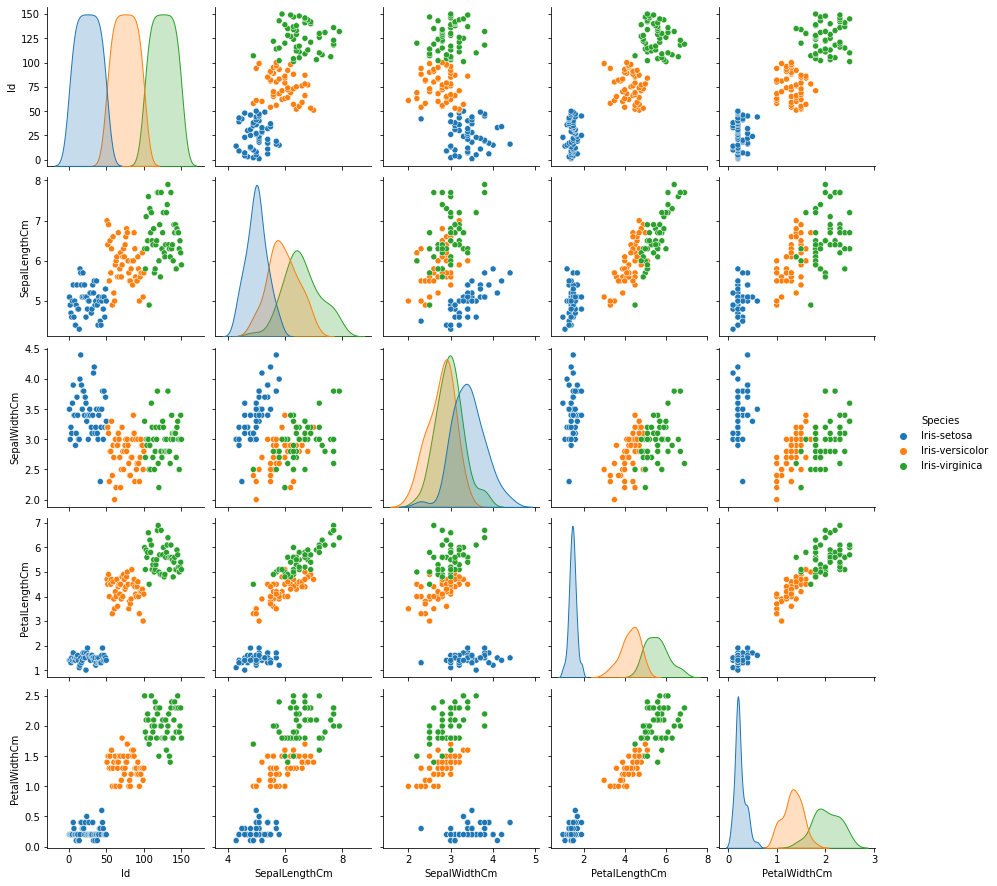

In [56]:
sns.pairplot(df, hue='Species')

### Observation: Iris-versicular and Iris-virginica overlap whereas Iris-Setosa is distinct

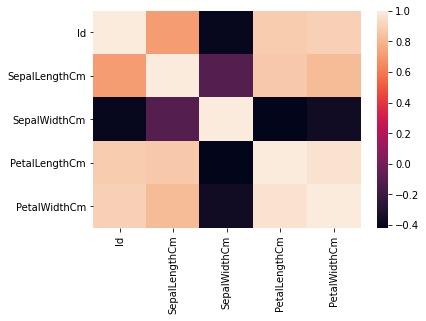

In [57]:
#Lets see the correlation
corr = df.corr()
sns.heatmap(corr)  #we can use heatmap to give a visual summary of the data

### Observation: 1)Petal length is highly related to petal width 
###                         2)Sepal length is not related to sepal width

## Data Pre-processing:

In [58]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.drop('Id', axis=1, inplace=True)   #drop the id column as it is not needed and doesnt effect our output

In [59]:
target=df['Species']

In [60]:
df1=df
df1=df1.drop('Species', axis=1)
df1.shape

(150, 5)

In [61]:
# extracting the x and y columns
from sklearn.preprocessing import LabelEncoder
X=df.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
y=df['Species'].values
df.shape

(150, 6)

In [62]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)


Traingin split: (120, 4)
Testin spllit: (30, 4)


### Training the Decision Tree model

In [63]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


### Evaluating the model

In [42]:
#Printing classification Report and Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


Since we have taken all the 4 features of the iris dataset the accuracy is 1 i.e 100% 

In [64]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

### Let's visualize our trained model

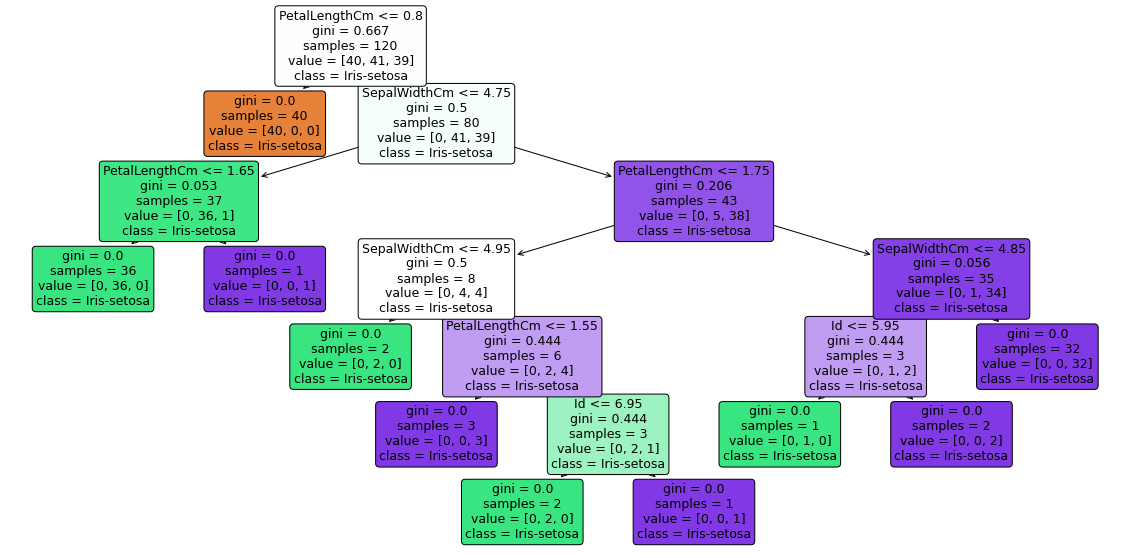

In [65]:
from sklearn.tree import plot_tree
mt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=df.columns,precision=3,rounded=True,filled=True,class_names=target.values)

### Conclusion: We have created the Decision Tree classifier and visualize it graphically.
